In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='chest_pain', ylabel='count'>

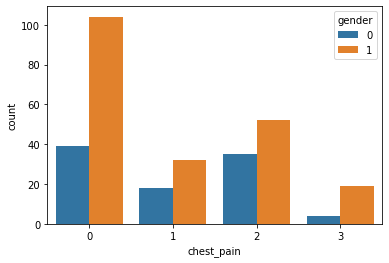

In [5]:
sns.countplot(x="chest_pain",hue="gender",data=df)

<AxesSubplot:>

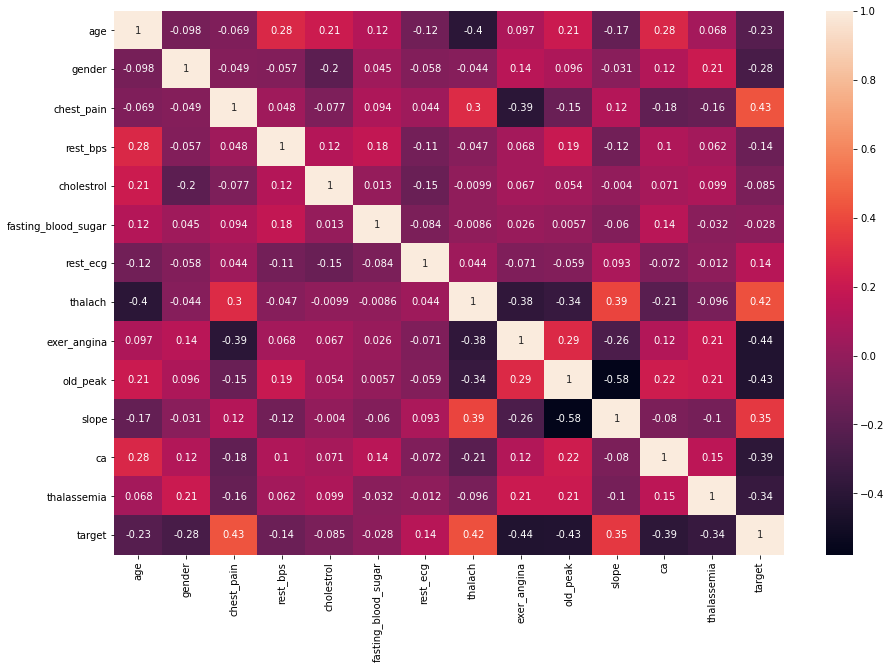

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [22]:
X = df.drop(['target','age','gender','cholestrol'], axis=1)
y=df["target"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [36]:
model = dtc(criterion='gini',max_depth=3,random_state=0)
model = model.fit(X_train, y_train)
print("Train Score :",model.score(X_train,y_train))
print("Test Score :",model.score(X_test,y_test))

Train Score : 0.8679245283018868
Test Score : 0.8131868131868132


In [47]:
pred_X_test=model.predict(X_test)
pred_X_train=model.predict(X_train)

In [48]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, pred_X_test)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train,pred_X_train )))

Model accuracy score with criterion gini index: 0.8132
Training-set accuracy score: 0.8679


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_X_test)

array([[32, 12],
       [ 5, 42]], dtype=int64)

<AxesSubplot:>

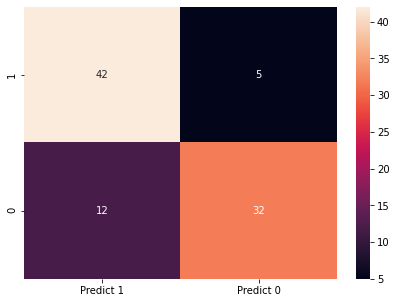

In [50]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,pred_X_test, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_X_test))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

